Import data and packages

Using TensorFlow backend.


(50000, 28, 28) (50000,)


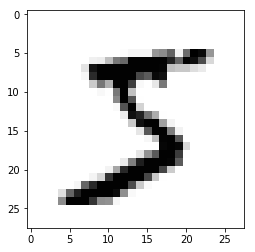

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [2]:
import numpy as np
import tensorflow as tf
s = tf.InteractiveSession()

Declaration of variables

In [3]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

nb_classes = 10
targets = y_train.reshape(-1)
y_train_flat = np.eye(nb_classes)[targets]
targets_test = y_test.reshape(-1)
y_test_flat = np.eye(nb_classes)[targets_test]

num = 150
batch_size = 500
num_iter = 12000

In [4]:
input_X = tf.placeholder('float32', shape=(None, X_train_flat.shape[1]))
input_y = tf.placeholder('float32', shape=(None, 10))
weights = tf.Variable(np.zeros((X_train_flat.shape[1],10),dtype = 'float32')) # tf.Variable(np.random.randint(5, size=(X.shape[1],1))/5.0,dtype=tf.float32) # 
b = tf.Variable(tf.zeros([10]))

Defining nn activation functions, loss and optimizer

In [5]:
def hidden_layer_activation(input,size_in,size_out):
    WW = tf.Variable(tf.truncated_normal([size_in,size_out],stddev=0.1))
    bb = tf.Variable(tf.truncated_normal([size_out],stddev=0.1))
    activation = tf.sigmoid(tf.matmul(input,WW)+bb)
    return activation
def output_layer_activation(input,size_in,size_out):
    WW = tf.Variable(tf.truncated_normal([size_in,size_out],stddev=0.1))
    bb = tf.Variable(tf.truncated_normal([size_out],stddev=0.1))
    activation = tf.nn.softmax(tf.matmul(input,WW)+bb)
    return activation


hidden = hidden_layer_activation(input_X,784,num)
output = output_layer_activation(hidden,num,10)

#predicted_y = tf.nn.softmax(tf.matmul(input_X, weights) + b)
#loss = tf.nn.softmax_cross_entropy_with_logits(logits = tf.matmul(hidden, weights) + b, labels=input_y)
#loss = tf.reduce_mean(-tf.log(output)*input_y -tf.log(1-output)*(1-input_y))
loss = tf.reduce_mean(-tf.reduce_sum(input_y * tf.log(output), reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)
correct_prediction = tf.equal(tf.argmax(output,1), tf.argmax(input_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Running optimization

In [6]:
loss_train = []
loss_test = []
iterations = []
from sklearn.metrics import roc_auc_score
import time
s.run(tf.global_variables_initializer())
start_time = time.time()
for i in range(num_iter):
    batch = np.random.choice(X_train_flat.shape[0], batch_size)
    s.run(optimizer, {input_X: X_train_flat[batch,:], input_y: y_train_flat[batch,:]})
    if (i+1)%500==0:
        loss_train_i = s.run(loss, {input_X: X_train_flat, input_y: y_train_flat})
        loss_test_i = s.run(loss, {input_X: X_test_flat, input_y: y_test_flat})
        loss_train.append(loss_train_i)
        loss_test.append(loss_test_i)
        iterations.append(i+1)
        #print("loss at iter %i:%.4f" % (i, loss_i))
        #print("train auc:", roc_auc_score(y_train_flat, s.run(output, {input_X:X_train_flat})))
        a = s.run(accuracy, feed_dict={input_X: X_train_flat, input_y: y_train_flat})
        print("train accuracy no ",i+1," :",a*100,"%")
        a2 = s.run(accuracy, feed_dict={input_X: X_test_flat,input_y: y_test_flat})
        #a2 = accuracy.eval(feed_dict={input_X: X_test_flat, input_y: y_test_flat})
        print("test accuracy no ",i+1," :",a2*100,"%")
        print("Current execution time: ",(time.time()-start_time)/60, " minutes")
        #print("test auc:", roc_auc_score(y_test_flat, s.run(output, {input_X:X_test_flat})))

train accuracy no  500  : 92.7879989147 %
test accuracy no  500  : 92.9300010204 %
Current execution time:  0.1992199659347534  minutes
train accuracy no  1000  : 94.6640014648 %
test accuracy no  1000  : 94.5699989796 %
Current execution time:  0.37173771460851035  minutes
train accuracy no  1500  : 95.9919989109 %
test accuracy no  1500  : 95.8100020885 %
Current execution time:  0.5882510344187418  minutes
train accuracy no  2000  : 96.850001812 %
test accuracy no  2000  : 96.3100016117 %
Current execution time:  0.7560360511144002  minutes
train accuracy no  2500  : 97.42000103 %
test accuracy no  2500  : 96.6400027275 %
Current execution time:  0.9477414011955261  minutes
train accuracy no  3000  : 97.9219973087 %
test accuracy no  3000  : 96.9399988651 %
Current execution time:  1.1294203996658325  minutes
train accuracy no  3500  : 98.189997673 %
test accuracy no  3500  : 97.1499979496 %
Current execution time:  1.3025692661603292  minutes
train accuracy no  4000  : 98.508000373

Accuracy of test set

In [7]:
acc = s.run(accuracy, feed_dict={input_X: X_test_flat,input_y: y_test_flat})
print("final test accuracy :",acc*100,"%")

final test accuracy : 97.8699982166 %


Train and test loss chart

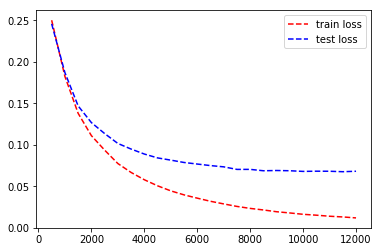

In [8]:
%matplotlib inline
plt.plot(iterations,loss_train,'r--',label='train loss')
plt.plot(iterations,loss_test,'b--',label='test loss')
plt.legend()
plt.show()